In [14]:
import math

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from collections import Counter
import struct
import time


def getrandbits(k):
    result = 0
    for _ in range(k):
        result <<= 1
        result |= struct.pack('f', time.process_time())[0] & 1
    return result


A = getrandbits(64)

def generate_random(k, m):
    global A
    A = (k*A) % m
    return A / m


rand = lambda: generate_random(5**16, 2**35)

## Задание 1

In [15]:
def exponential_numbers(a, size):
    numbers = []
    for i in range(size):
        num = 1
        while not num < 1:
            num = rand()
        numbers.append(num)

    array = [((-1) / a) * (math.log(1 - num)) for num in numbers]
    return array

In [16]:
def find_chi(obs, exp, bins=10):
    fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
    o = axs[0].hist(obs, density=True, bins=bins)
    e = axs[1].hist(exp, density=True, bins=o[1])
    return len(obs) * sum((a - b) ** 2 / b for (a, b) in zip(o[0], e[0]) if b > 0)

In [ ]:
L = float(input("L="))
size = 10 ** 6

expected = np.random.exponential(1/L, size)
observable = exponential_numbers(L, size)

probabilities, intervals, _ = plt.hist(observable, bins="auto", density=True)
plt.show()

In [ ]:
data = np.column_stack((observable, expected))

fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)

axs.hist(data, bins=np.arange(0, 25))
plt.show()

In [9]:
x = observable

M = sum(x)/len(x)
D = sum([(i - M)**2 for i in x])/len(x)

print("M =", M)
print("D =", D)

M = 0.0
D = 0.0


In [10]:
eps = 1.95*np.sqrt(D/len(x))

(M-eps, M+eps)

(0.0, 0.0)

In [11]:
chi_r = stats.chi2.ppf(0.05, len(x)-1)
chi_l = stats.chi2.ppf(0.95, len(x)-1)

((len(x)-1)*D/chi_l, (len(x)-1)*D/chi_r)

(0.0, 0.0)

0.0

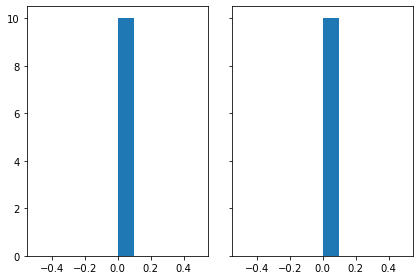

In [12]:
find_chi(observable, expected, 10)

In [13]:
stats.chi2.ppf(0.95, 10 - 2)

15.50731305586545

## Задание 2

In [54]:
def discrete_function(p):
    return [((1-p)**n) * p for n in range(10**6)]

def calc_distribution(probs):
    distrib = [0]
    for i, p in enumerate(probs):
        distrib.append(distrib[i] + p)
    distrib[-1] = 1
    return distrib

def discrete_numbers(probs, n):
    distrib = calc_distribution(probs)
    numbers = Counter()

    for r in (rand() for _ in range(n)):
        for i, p in enumerate(distrib):
            if r < p:
                numbers[i] += 1
                break

    return [i/size for i in numbers.values()]

In [55]:
p = float(input("p="))
size = 10 ** 6

expected = discrete_function(p)
observable = sorted(discrete_numbers(expected, size), reverse=True)

expected = expected[:len(observable)]

print(expected[:10])
print(observable[:10])

[0.2, 0.16000000000000003, 0.12800000000000003, 0.10240000000000003, 0.08192000000000002, 0.06553600000000002, 0.052428800000000025, 0.041943040000000015, 0.033554432000000016, 0.026843545600000015]
[0.200442, 0.159406, 0.128446, 0.102237, 0.081526, 0.065808, 0.052577, 0.042043, 0.033588, 0.026667]


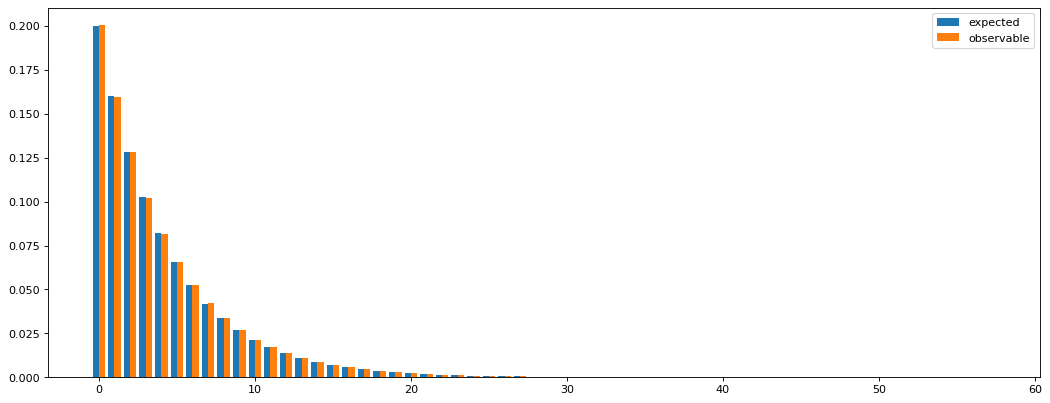

In [56]:
plt.figure(figsize=(16, 6), dpi=80)

X_axis = np.arange(len(expected))
plt.bar(X_axis - 0.2, expected, 0.4, label='expected')
plt.bar(X_axis + 0.2, observable, 0.4, label='observable')

plt.legend(loc='best')

plt.show()

In [ ]:
x = observable

M = sum((x[n] * n for n in range(len(x))))
D = sum([x[n] * (n - M)**2 for n in range(len(x))])

print("M =", M, "q/p =", (1-p)/p)
print("D =", D, "q/p^2 =", (1-p)/(p**2))

In [ ]:
eps = 1.95*np.sqrt(D/len(x))

(M-eps, M+eps)

In [ ]:
chi_r = stats.chi2.ppf(0.05, len(x)-1)
chi_l = stats.chi2.ppf(0.95, len(x)-1)

((len(x)-1)*D/chi_l, (len(x)-1)*D/chi_r)

In [ ]:
len(observable) * sum((a - b) ** 2 / b for (a, b) in zip(observable, expected))